## Extreme temperatures north of Greenland?  
Description: Notebook describing my efforts to download and explore the Kap Morris met station data   
Input requirements: DMI met station data for Kap Morris Jessup   
Author: Alek Petty  /  alekpetty@gmail.com   /  www.alekpetty.com



## Data Wrangling 

The Danish met station data has to obtained from this one zip file
'DMIRep17-08_old_dataformat_1958_2013.zip'
https://t.co/IP3CM4Jf9f   

Info here: http://sciencedocbox.com/Weather/75591106-Dmi-report-weather-observations-from-greenland-observation-data-with-description.html

It contains data for all the DMI stations for this historical period!   

For 2017 onwards...   

Use the data from here: https://www.ncei.noaa.gov/data/global-hourly/

Data access just changed from: 
https://www7.ncdc.noaa.gov/CDO/cdopoemain.cmd?datasetabbv=DS3505&countryabbv=&georegionabbv=&resolution=40 

Our Kap Morris station ID is #43010   
https://www.ncei.noaa.gov/data/global-hourly/access/2017/04301099999.csv


Problems/potential issues:    
 - Was very tough to find! I had to use twitter to point me in the right direction.    
 - I initially used the historical dataset, but now looks like I should be using theglobal-hourly repository to compile the data.
 


In [193]:
# Load Python modules
%matplotlib inline
import matplotlib
from mpl_toolkits.basemap import Basemap, shiftgrid
from pylab import *
import numpy.ma as ma
import pandas as pd
import seaborn as sns
#sns.set_style("whitegrid")
# Set folder links
dataPath = './Data/'
figpath='../Figures/'
dataOutPath='../DataOutput/'

plt.style.available
plt.style.use('ggplot')

import warnings; warnings.simplefilter('ignore')

In [162]:
# Read data into a dataframe. 
#KapMorris201704301099999
# wind is column 10, ignore for now
dF1 = pd.read_csv(dataPath+'KapMorris201704301099999.csv', header=1, usecols=[1, 13], 
                 names=['timeStamp', 'tempRaw'])
dF1.tail(3) #provides information about the dataframe

,timeStamp,tempRaw
8531,2017-12-31T21:00:00,"-0297,1"
8532,2017-12-31T22:00:00,"+9999,9"
8533,2017-12-31T23:00:00,"-0293,1"


In [163]:
dF2 = pd.read_csv(dataPath+'KapMorris201804301099999.csv', header=1, usecols=[1, 13], 
                 names=['timeStamp', 'tempRaw'])
dF = pd.concat([dF1, dF2])
dF.tail(3)

,timeStamp,tempRaw
3676,2018-06-05T10:00:00,"-0050,1"
3677,2018-06-05T11:00:00,"-0050,1"
3678,2018-06-05T12:00:00,"-0048,1"


In [164]:
# divide raw temp readings by 10
dF['temp'] = pd.Series([int(x[0:5])/10. for x in dF['tempRaw'].values], index=dF.index)
# Extract date/time information.
# Bit crude but works..
dF['year'] = pd.Series([int(x[0:4]) for x in dF['timeStamp'].values], index=dF.index)
dF['month'] = pd.Series([int(x[5:7]) for x in dF['timeStamp'].values], index=dF.index)
dF['day'] = pd.Series([int(x[8:10]) for x in dF['timeStamp'].values], index=dF.index)
dF['hour'] = pd.Series([int(x[11:13]) for x in dF['timeStamp'].values], index=dF.index)

dF.head()

,timeStamp,tempRaw,temp,year,month,day,hour
0,2017-01-01T23:00:00,"-0176,1",-17.6,2017,1,1,23
1,2017-01-02T00:00:00,"-0162,1",-16.2,2017,1,2,0
2,2017-01-02T01:00:00,"-0169,1",-16.9,2017,1,2,1
3,2017-01-02T02:00:00,"-0154,1",-15.4,2017,1,2,2
4,2017-01-02T03:00:00,"-0171,1",-17.1,2017,1,2,3


In [165]:
# Filter out the negative (NaN) values

dF.loc[dF['temp'] > 900,'temp'] = np.nan
dF=dF.drop(columns=['tempRaw'])
dF.tail(3)

,timeStamp,temp,year,month,day,hour
3676,2018-06-05T10:00:00,-5.0,2018,6,5,10
3677,2018-06-05T11:00:00,-5.0,2018,6,5,11
3678,2018-06-05T12:00:00,-4.8,2018,6,5,12


In [166]:
# Check our ability to subset based on years/months
#data=dF.loc[(dF['year'] == 2017) & dF['month'].isin([2, 3])]
#data.head(3)

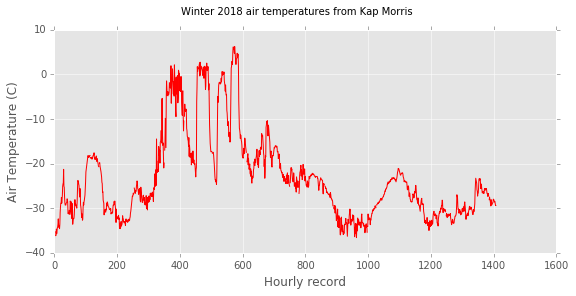

In [167]:
# Let's take a look at winter 2018 data 

fig = figure(figsize=(9,4))
#dF.loc[(dF['year'] == 2017) & dF['month'].isin([2, 3])]['timeStamp'].values,
ax = plt.plot(dF.loc[(dF['year'] == 2018) & dF['month'].isin([2, 3])]['temp'].values, color='r')
#ax = plot(dF.loc[(dF['year'] == 2018) & dF['month'].isin([2, 3])]['temp'].values, color='k')
a = ylabel('Air Temperature (C)')
a = xlabel('Hourly record')
b=suptitle('Winter 2018 air temperatures from Kap Morris')

In [168]:
## Wanted to read in the 2014-2016 data but the format seems very odd.

In [194]:
# Read in the 1958 to 2013 data. Looks like this starts from 1980

from glob import glob
files = glob(dataPath+'/DMIRep17-08_old_dataformat_1958_2013/04301.txt')
dF58 = pd.read_csv(files[0], header=1, delimiter='\t', usecols=[1, 2, 3, 4, 9], names=['year', 'month', 'day', 'hour', 'tempRaw'])
dF58.head(3)

,year,month,day,hour,tempRaw
0,1980,7,16,15,10
1,1980,7,16,21,0
2,1980,7,17,0,-10


In [170]:
# divide by 10 and convert empty cells to nan

tempA=pd.to_numeric(dF58['tempRaw'].values, errors='coerce')/10.
dF58['temp'] = pd.Series(tempA, index=dF58.index)
dF58=dF58.drop(columns=[ 'tempRaw'])
dF58.tail(3)

,year,month,day,hour,temp
98029,2013,12,30,11,-34.8
98030,2013,12,30,12,-36.0
98031,2013,12,30,13,-36.6


In [171]:
dfALL=pd.concat([dF58, dF])
dfALL=dfALL.reset_index(drop=True)
dfALL.head(3)

,day,hour,month,temp,timeStamp,year
0,16,15,7,1.0,NaN,1980
1,16,21,7,0.0,NaN,1980
2,17,0,7,-1.0,NaN,1980


In [172]:
dfALL.tail(3)

,day,hour,month,temp,timeStamp,year
110242,5,10,6,-5.0,2018-06-05T10:00:00,2018
110243,5,11,6,-5.0,2018-06-05T11:00:00,2018
110244,5,12,6,-4.8,2018-06-05T12:00:00,2018


In [173]:
# Convert dates to hours after Jan 1st 1980 for simplicity of plotting/analysis

#from datetime import datetime 
#def getHoursAfter(year, month, day, hour):
#    d0 = datetime(1980, 1, 1, 0)
#    d1 = datetime(year, month, day, hour)
#    delta = d1-d0
#    return int(delta.days*24 + delta.seconds/3600)

#hoursAfter= [getHoursAfter(year, month, day, hour) for x in dFALL['timeStamp'].values
#dfALL['hoursAfter1980']=dfALL.apply(lambda x: getHoursAfter(x['year'], x['month'], x['day'], x['hour']), axis=1)
#dfALL.head()

In [174]:
# Convert dates to hours after Jan 1st 1980 for simplicity of plotting/analysis

from datetime import datetime 
def getYearFraction(year, month, day, hour):
    d0 = datetime(year, 1, 1, 0)
    d1 = datetime(year, month, day, hour)
    delta = d1-d0
    deltaHours = int(delta.days*24 + delta.seconds/3600)
    hoursInYear=365*24 # need to adjust this to leap years
    return float(year)+ (deltaHours/hoursInYear)

#hoursAfter= [getHoursAfter(year, month, day, hour) for x in dFALL['timeStamp'].values
dfALL['yearFraction']=dfALL.apply(lambda x: getYearFraction(x['year'], x['month'], x['day'], x['hour']), axis=1)
dfALL.head(3)

,day,hour,month,temp,timeStamp,year,yearFraction
0,16,15,7,1.0,NaN,1980,1980.541438
1,16,21,7,0.0,NaN,1980,1980.542123
2,17,0,7,-1.0,NaN,1980,1980.542466


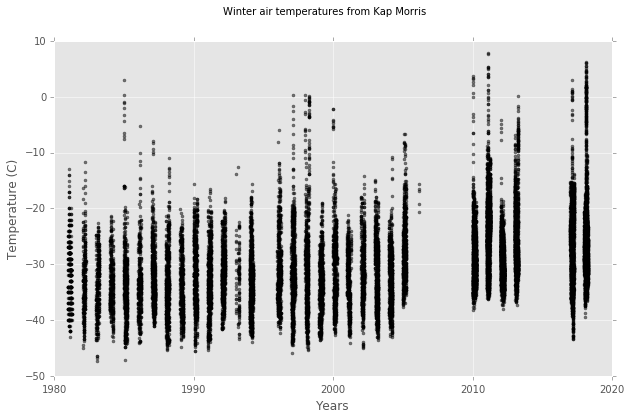

In [175]:
# Need to add day of year as a column value to use as the x values..
fig = figure(figsize=(10,6))
ax=gca()
#ax = sns.plot(data=data['tempAdjusted (C)'].values)
#ax = plot(dfALL['hoursAfter1980'].values, dfALL['temp'].values, color='k', marker='.', linestyle='None', alpha=0.5)
p = plot(dfALL.loc[dfALL['month'].isin([1, 2, 3])]['yearFraction'].values, dfALL.loc[dfALL['month'].isin([1, 2, 3])]['temp'].values, color='k', marker='.', linestyle='None', alpha=0.5)
#ax = plot(dfALL.loc[dfALL['month'].isin([1, 2, 3])]['hoursAfter1980'].values, dfALL.loc[dfALL['month'].isin([1, 2, 3])]['temp'].values, color='r')
xlabel('Years')
xticks(np.arange(1980, 2021, 10))
ax.set_xticklabels(np.arange(1980, 2021, 10))
ylabel('Temperature (C)')
a=suptitle('Winter air temperatures from Kap Morris')
#ax = plot(dfALL.loc[(dF['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values, color='k')


In [195]:
numPositives = size(where(dfALL.loc[dfALL['month'].isin([1, 2, 3])]['temp'].values>0))
numRecords = size(where(dfALL.loc[dfALL['month'].isin([1, 2, 3])]['temp'].values))

print ("number of hourly records above freezing:", numPositives, "out of ", numRecords)

number of hourly records above freezing: 95 out of  25387


In [197]:
numPositives = size(where(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values>0))
numRecords = size(where(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values))

print ("number of hourly records above freezing prior to 2018:", numPositives, "out of ", numRecords)
numPositives = size(where(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values>0))
numRecords = size(where(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values))

print ("number of hourly records above freezing in 2018:", numPositives, "out of ", numRecords)


number of hourly records above freezing prior to 2018: 35 out of  23240
number of hourly records above freezing in 2018: 60 out of  2147


In [178]:
# Partition data into 2018 and pre-2018

TaPre2018=dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values[pd.notnull(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]
YearFracPre2018=dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['yearFraction'].values[pd.notnull(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]

Ta2018=dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values[pd.notnull(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]
YearFrac2018=dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['yearFraction'].values[pd.notnull(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]

### Normally distributed?

In [198]:
# check difference between median and mean 
np.mean(TaPre2018), np.median(TaPre2018)
# maybe not toooo bad

(-30.134136008918617, -30.8)

In [199]:
# Do a proper test for normal fit of data

#np.amin(TaPre2018), np.mean(TaPre2018), np.amax(TaPre2018), np.std(TaPre2018)
from scipy import stats
k,p= stats.normaltest(TaPre2018)
p

0.0

### Not normal distributed data, but let's carry on regardless as everyone else does...

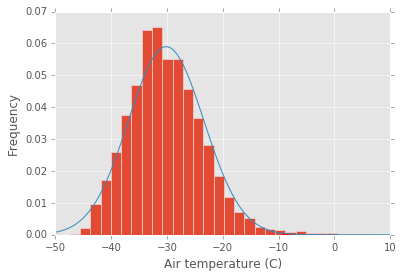

99th percentile -12.697482401930554
4 sigma: -3.1005645252161926


In [200]:
base = np.linspace(-50, 10, 100)
normal = stats.norm.pdf(base, np.mean(TaPre2018), np.std(TaPre2018))

bound1 = np.mean(TaPre2018) + (1 * np.std(TaPre2018))
bound2 = np.mean(TaPre2018) + (2 * np.std(TaPre2018))
bound3 = np.mean(TaPre2018) + (3 * np.std(TaPre2018))
bound4 = np.mean(TaPre2018) + (4 * np.std(TaPre2018))
bound99 = np.mean(TaPre2018) + (2.58 * np.std(TaPre2018))

#anomalous = np.logical_or(base > [bound4]*100)
h=plt.hist(TaPre2018, bins=30,normed=True) 
plt.plot(base, normal)
plt.fill_between(base, normal, where=base > [bound3]*100, color=[1, 0, 0, 1], zorder=2)
plt.xlim(-50, 10)
plt.xlabel('Air temperature (C)')
plt.ylabel('Frequency')
plt.show()
print('99th percentile', bound99)
print('4 sigma:', bound4)

[Text(0,0,'2018'), Text(0,0,'2018.1'), Text(0,0,'2018.2')]

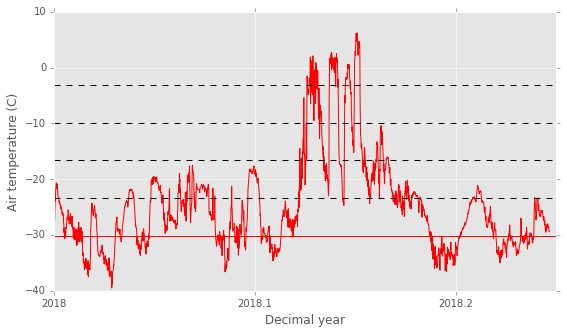

In [202]:
# Let's take a look at winter 2018 data again and compare to this mean & sigma values

fig = figure(figsize=(9,5))
#dF.loc[(dF['year'] == 2017) & dF['month'].isin([2, 3])]['timeStamp'].values,
ax = gca()
#plot(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['yearFraction'].values, dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values, color='r')
plot(YearFrac2018,Ta2018, color='r')

axhline(np.mean(TaPre2018), color='r')
axhline(np.mean(TaPre2018)+1*np.std(TaPre2018), color='k', ls='--')
axhline(np.mean(TaPre2018)+2*np.std(TaPre2018), color='k', ls='--')
axhline(np.mean(TaPre2018)+3*np.std(TaPre2018), color='k', ls='--')
axhline(np.mean(TaPre2018)+4*np.std(TaPre2018), color='k', ls='--')

xlabel('Decimal year')
ylabel('Air temperature (C)')
ax.set_xticks([2018, 2018.1, 2018.2])#ax = plot(dF.loc[(dF['year'] == 2018) & dF['month'].isin([2, 3])]['temp'].values, color='k')
ax.set_xticklabels(['2018', '2018.1','2018.2'])

## How important might it be to detrend the data?

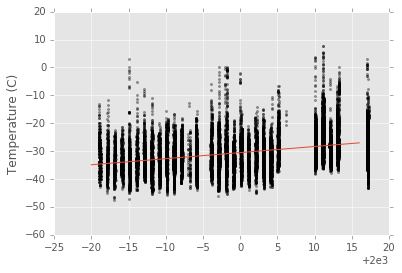

In [183]:
# Let's look athe trends in winter temperatures for the 1980-2006 time period.
TaPre2018=dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values[pd.notnull(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]
YearFracPre2018=dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['yearFraction'].values[pd.notnull(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]

#model = LinearRegression()
#model.fit(X, y)
import statsmodels.api as sm
X = sm.add_constant(YearFracPre2018)
model=sm.OLS(TaPre2018, X)

fit=model.fit()
years=np.arange(1980, 2017, 1)
trendLine = fit.predict(sm.add_constant(years))
scatter(YearFracPre2018, TaPre2018, marker='.', color='k', alpha=0.4)
plot(years, trendLine)
ylab = ylabel('Air temperature (C)')

In [203]:
#fit.predict(2010)[0]
def detrendTemps(yearFracT, tempT):
    
    return tempT - fit.predict([1, yearFracT])[0]

#hoursAfter= [getHoursAfter(year, month, day, hour) for x in dFALL['timeStamp'].values
dfALL['tempDetrended']=dfALL.apply(lambda x: detrendTemps(x['yearFraction'], x['temp']), axis=1)
dfALL.tail(3)

,day,hour,month,temp,timeStamp,year,yearFraction,tempDetrended
110242,5,10,6,-5.0,2018-06-05T10:00:00,2018,2018.425799,21.510953
110243,5,11,6,-5.0,2018-06-05T11:00:00,2018,2018.425913,21.510928
110244,5,12,6,-4.8,2018-06-05T12:00:00,2018,2018.426027,21.710903


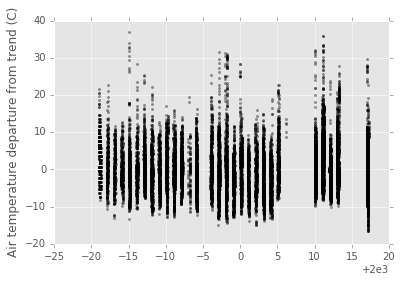

In [205]:
# Partition the detrended data

TaDtPre2018=dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['tempDetrended'].values[pd.notnull(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]
#YearFracPre2018Dt=dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['yearFraction'].values[pd.notnull(dfALL.loc[(dfALL['year'] < 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]

TaDt2018=dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['tempDetrended'].values[pd.notnull(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]
#YearFrac2018=dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['yearFraction'].values[pd.notnull(dfALL.loc[(dfALL['year'] == 2018) & dfALL['month'].isin([1, 2, 3])]['temp'].values)]

scatter(YearFracPre2018, TaDtPre2018, marker='.', color='k', alpha=0.4)
#plot(years, trendLine)
ylab = ylabel('Air temperature departure from trend (C)')

0.0


/Applications/anaconda/envs/py36env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


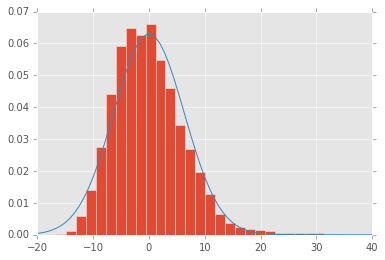

In [186]:
#k,p= stats.normaltest(TaDtPre2018)
print (p)
base = np.linspace(-40, 40, 100)
normal = stats.norm.pdf(base, np.mean(TaDtPre2018), np.std(TaDtPre2018))

#anomalous = np.logical_or(base > [bound4]*100)
h=plt.hist(TaDtPre2018, bins=30,normed=True) 
plt.plot(base, normal)
#plt.fill_between(base, normal, where=base > [bound3]*100, color=[1, 0, 0, 1], zorder=2)
plt.xlim(-20, 40)
plt.show()
#print('99th percentile', bound99)
#print('4 sigma:', bound4)


[Text(0,0,'2018'), Text(0,0,'2018.1'), Text(0,0,'2018.2')]

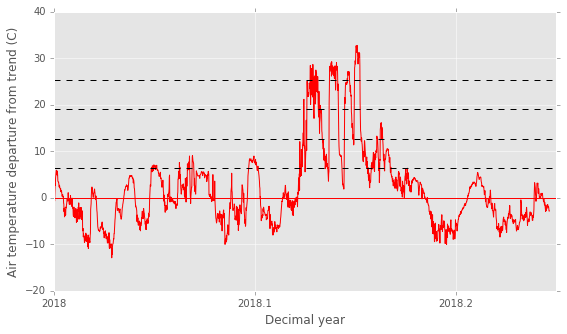

In [206]:
# Let's take a look at winter 2018 data again

fig = figure(figsize=(9,5))
#dF.loc[(dF['year'] == 2017) & dF['month'].isin([2, 3])]['timeStamp'].values,
ax = gca()
plot(YearFrac2018,TaDt2018, color='r')

axhline(np.mean(TaDtPre2018), color='r')
axhline(np.mean(TaDtPre2018)+1*np.std(TaDtPre2018), color='k', ls='--')
axhline(np.mean(TaDtPre2018)+2*np.std(TaDtPre2018), color='k', ls='--')
axhline(np.mean(TaDtPre2018)+3*np.std(TaDtPre2018), color='k', ls='--')
axhline(np.mean(TaDtPre2018)+4*np.std(TaDtPre2018), color='k', ls='--')

xlabel('Decimal year')
ylabel('Air temperature departure from trend (C)')
ax.set_xticks([2018, 2018.1, 2018.2])#ax = plot(dF.loc[(dF['year'] == 2018) & dF['month'].isin([2, 3])]['temp'].values, color='k')
ax.set_xticklabels(['2018', '2018.1','2018.2'])

## What other ways might we want to explore to characterize these winter events?

### The median absolute deviation?
### Just looking at the distribution of the warm outbreaks rather than all the winter temps?
### Bayesian statistics?

In [188]:
# The median absolute deviation?

med = np.median(TaDtPre2018)
np.median(np.abs(TaDtPre2018 - med))

4.069838608519092

In [213]:
# Just look at the warm outbreaks?

TaDtPre2018adj=TaDtPre2018[where(TaDtPre2018>25)]
#TaDtPre2018adj
k,p= stats.normaltest(TaDtPre2018adj)
print (p)
base = np.linspace(-40, 40, 100)
normal = stats.norm.pdf(base, np.mean(TaDtPre2018adj), np.std(TaDtPre2018adj))

0.043766845352140066


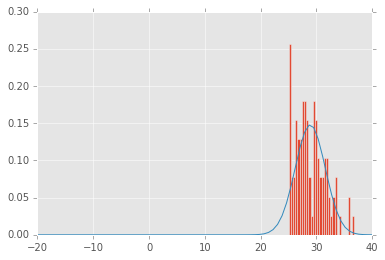

In [214]:
#anomalous = np.logical_or(base > [bound4]*100)
h=plt.hist(TaDtPre2018adj, bins=30,normed=True) 
plt.plot(base, normal)
#plt.fill_between(base, normal, where=base > [bound3]*100, color=[1, 0, 0, 1], zorder=2)
plt.xlim(-20, 40)
plt.show()
#print('99th percentile', bound99)
#print('4 sigma:', bound4)

In [208]:

#from scipy.stats import( kstest, poisson)
#mu=np.mean(TaDtPre2018)
#a=stats.norm.rvs(size=1000)
#stats.normaltest(a)
#stats.kstest(a, 'norm')
#print (p)
#base = np.linspace(-40, 40, 100)
#normal = stats.norm.pdf(base, np.mean(TaDtPre2018), np.std(TaDtPre2018))

#anomalous = np.logical_or(base > [bound4]*100)
#h=plt.hist(TaDtPre2018, bins=30,normed=True) 
#plt.plot(base, normal)

#poissonDis = poisson.rvs(mu,size=10000)
#kstest(TaDt2018,'norm')
#stats.kstest(TaDtPre2018, 'norm')
#poissonDis
#a=stats.norm.rvs(size=10000000)
#a
#stats.kstest(a, 'norm')